# Naive Bayes i Classificació


En aquest tercer lliurament es programarà un classificador, que donada una *piulada*, la categoritzarà en una de les possibles classes. En aquesta ocasió, implementareu un classificador amb *piulades* relacionades amb el *cyber bullying*.

Recordeu que l'objectiu principal d'aquesta pràctica és desenvolupar un classificador amb una *accuracy* alta. 


**Què s’ha de fer?**

Volem classificar *piulades* segons a quin tipus de *cyber bullying* pertanyen. Així doncs, a partir de tots les *piulades* que tenim, crearem un vector de característiques que ens descrigui cadascuna. A continuació desenvoluparem un classificador probabilístic del tipus **Naive Bayes** que ens permeti identificar a quina classe de *cyber bullying* pertany una *piulada* donada, segons les característiques disenyades.


**Quina és la idea del sistema de classificació que s’ha de desenvolupar?**

El classificador és un concepte de l'aprenentatge automàtic supervisat. L'objectiu del classificador és donat un vector de característiques que descriuen els objectes que es volen classificar indicar a quina categoria o classe pertanyen d'entre un conjunt predeterminat. 

El procés de classificació consta de dues parts: 

+ el procés d'aprenentatge i 
+ el procés d'explotació o testeig. 

El procés d'aprenentatge rep exemples de parelles $(x,y)$ on $x$ són les característiques, usualment representades per nombres reals, i $y$ és la categoria a la que pertanyen. 
Aquest conjunt se'l coneix com a conjunt d'entrenament i ens servirà per trobar una funció $\hat{y}=f(x)$ que donada una $x$ aconsegueixi que $\hat{y}$ sigui semblant $y$. 

Per altra banda el procés de testeig aplica la funció $f(x)$ apresa a l'entrenament a a dades no presents en el conjunt d'aprenentatge per avaluar el classificador.

**Classificació i llenguatge natural**

La descripció dels exemples en característiques és el punt més crític de tot sistema d'aprenentatge automàtic. 
Una de les representacions més simples per tal de descriure un text és la representació ["bag-of-words"](https://en.wikipedia.org/wiki/Bag-of-words_model).

Aquesta representació converteix un text en un vector de $N$ paraules. 
Primer haurem de seleccionar el conjunt d'$N$ paraules que volem fer servir. Després, per cada paraula comptar quants cops apareix en el text. 

Una versió alternativa i més simple d'aquest procés pot ser simplement indicar al vector si una determinada paraula apareix o no en el text.

## Abans de començar


**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy, Re` i `NLTK`

Python té un paquet integrat anomenat ["re"](https://www.w3schools.com/python/python_regex.asp), que es pot utilitzar per treballar amb expressions regulars. És molt aconsellable fer servir aquest paquet per processar les paraules.

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant els testos, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

## Les dades

El 15 d'Abril de 2020, UNICEF va llançar una alarma com a resposta de l'augment de risc de *cyber bullying* durant la pandèmia COVID-19. 

Les estadístiques són prou alarmants: un 36.5% dels estudiants de l'escola fins a l'institut s'han sentit víctimes del *cyber bullying* i un 87% n'han estat testimonis, amb efectes que van des d'una disminució de resultats acadèmics fins a pensaments suïcides.

Amb l'objectiu d'ajudar a l'analisis de la situació, s'ha construit un dataset que conté més de 47000 *piulades* etiquetades d'acord amb la classe de *cyber bullying* que s'està donant:

1. `age`;
2. `ethnicity`;
3. `gender`;
4. `religion`;
5. `other type of cyberbullying`;
6. `not cyberbullying`

Les dades han estat balancejades per tal de contenir aproximadament 8000 mostres de cada classe.

# Preparar les dades

## Lectura de les dades

In [1506]:
import pandas as pd
import numpy as np
import re

In [1507]:
df = pd.read_csv('data/cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [1508]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

## Preparació del dataset

Dividim les *piulades* en un conjunt d'entrenament, *train*, i en un conjunt de validació, *test*, per tal de poder entrenar i validar el nostre model de classificació.

In [1509]:
from sklearn.model_selection import train_test_split

df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

Com les dades estaven balancejades originalment, podem observar que la distribució de cadascuna de les classes es manté:

In [1510]:
df_tweets_train['cyberbullying_type'].value_counts()

age                    6416
not_cyberbullying      6393
religion               6361
ethnicity              6353
gender                 6334
other_cyberbullying    6296
Name: cyberbullying_type, dtype: int64

In [1511]:
df_tweets_test['cyberbullying_type'].value_counts()

gender                 1639
religion               1637
ethnicity              1608
age                    1576
not_cyberbullying      1552
other_cyberbullying    1527
Name: cyberbullying_type, dtype: int64

# Implementació

Dividirem el notebook en 3 seccions que es complementen una a l'altra:

1. Anàlisi exploratòria de les dades: Informació bàsica sobre les *piulades*.
2. Processament de les dades: Creació d'un vector de característiques a partir de les *piulades*.
3. Desenvolupament d'un classificador *Naive Bayes*. 

### 1. Anàlisis de dades

El primer que haurem de fer és analitzar les dades per veure una mica com són. El que us proposem és fer una sèrie de visualitzacions per observar les dades, com ara:

* el nombre de *piulades* que s'estan dirigint a una persona en concret
* el nombre de  *hashtags* que hi ha a cada categoria de *piulades*
* el nombre de  *piulades* que hi ha de cada categoria de *piulades*
* el nombre de  *piulades* de la categoria `not_cyberbullying` que es dirigeixen a un usuari vs totes les altres categories
* altres coses que penseu que poden ser rellevants.

In [1512]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1513]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
22022,A lying Christian woman is still a liar,religion
6682,I'm so angry! That bread roll alone should be ...,not_cyberbullying
7523,"#KatandAndre just shhhh, sto…",not_cyberbullying
18167,Yes....its the real history which u cant find ...,religion
11436,We shall never call fake girls by the title 'b...,gender


#### **EXERCICI 1:** 

* Quantes *piulades* estan dirigides a un usuari concret? Diem que una piulada va dirigida a una persona en concret si contenen el patró ``@usuari``. 

[Restriccions](https://help.twitter.com/en/managing-your-account/change-twitter-handle) que imposa X sobre el patró:
+ Nomes són valids aquells patrons amb caràcters alfanumèrics ``[A-z 0-9]`` i el caràcter ``_``
+ Els patrons han de començar per ``@`` i han de tenir més de 4 i menys de 16 caràcters.

En aquest exercici és extremadament útil l'ús del mòdul ``re``.

In [1514]:
# El vostre codi aquí

def count_mentions(text):
    return len(re.findall(r'@\w{4,15}', text))


total_mentions = df['tweet_text'].apply(count_mentions).sum()

print(f"Total de mencions: {total_mentions}")


Total de mencions: 26730


+ Quants *hashtags* ``#`` hi ha a cada categoria de *piulades*?

Compteu els ``#`` que vagin seguits d'alguna lletra o nombre ja que, com veiem a la [normativa](https://help.twitter.com/en/using-twitter/how-to-use-hashtags) de X, els ``#`` no poden contenir cap mena de signe de puntuació.

In [1515]:
# Funció per comptar els hashtags en un text
def count_hashtags(text):
    return len(re.findall(r'#[\w]+', text))

df['hashtag_count'] = df['tweet_text'].apply(count_hashtags)

hashtag_counts_by_category = df.groupby('cyberbullying_type')['hashtag_count'].sum()

hashtag_counts_by_category

cyberbullying_type
age                     739
ethnicity              1112
gender                 2694
not_cyberbullying      3274
other_cyberbullying    1629
religion               1803
Name: hashtag_count, dtype: int64

+ Fes un histograma que representi aquesta distribució?

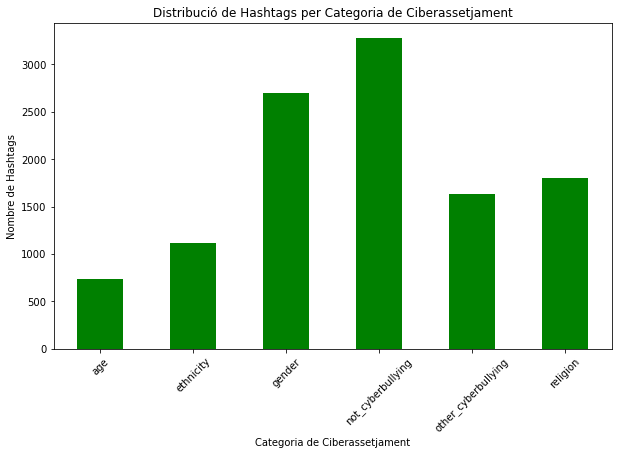

In [1516]:
# El vostre codi aquí
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
hashtag_counts_by_category.plot(kind='bar', color='green')

plt.title('Distribució de Hashtags per Categoria de Ciberassetjament')
plt.xlabel('Categoria de Ciberassetjament')
plt.ylabel('Nombre de Hashtags')
plt.xticks(rotation=45)

plt.show()

+ Comproveu a continuació quantes vegades hi ha un ús invàlid dels ``#``, per exemple ``##`` o ``#@``, on, si no tinguessim en compte la restriccio imposada, hauriem contat 2 ``#`` a ``##`` o 1 ``#`` a ``#@``, quan en realitat son 1 i 0 respectivament.

In [1517]:
# El vostre codi aquí
# Definir l'expressió regular per buscar hashtags invàlids
invalid_hashtag_pattern = r'#@'

# Funció per comptar els hashtags invàlids en un text
def count_invalid_hashtags(text):
    # Comptar hashtags dobles
    double_hashtags = len(re.findall(r'#{2,}', text))

    # Comptar hashtags seguits immediatament per @
    hashtag_at = len(re.findall(invalid_hashtag_pattern, text))
    
    at_followed_by_hashtag = len(re.findall(r'@#', text))
    
    hashtag_followed_by_space = len(re.findall(r'#\s', text))

    # El total serà la suma dels dos tipus d'hashtags invàlids
    return double_hashtags + hashtag_at + at_followed_by_hashtag + hashtag_followed_by_space


# Aplicar la funció a cada tuit
df['invalid_hashtag_count'] = df['tweet_text'].apply(count_invalid_hashtags)

# Sumar el total d'hashtags invàlids
invalid_hashtag_counts_by_category_extended = df.groupby('cyberbullying_type')['invalid_hashtag_count'].sum()

invalid_hashtag_counts_by_category_extended


cyberbullying_type
age                     1
ethnicity               5
gender                  4
not_cyberbullying       7
other_cyberbullying    14
religion                0
Name: invalid_hashtag_count, dtype: int64

+ Quantes *piulades* vàlides hi ha de cada categoria?

In [1518]:
# El vostre codi aquí
# Considerem una piulada vàlida si no té hashtags invàlids
# Comptem el nombre de piulades vàlides en cada categoria

# Crear una columna que indica si la piulada és vàlida
df['is_valid_tweet'] = df['invalid_hashtag_count'] == 0

valid_tweets_by_category = df.groupby('cyberbullying_type')['is_valid_tweet'].sum()

# Mostrar els resultats
valid_tweets_by_category


cyberbullying_type
age                    7991
ethnicity              7956
gender                 7969
not_cyberbullying      7938
other_cyberbullying    7811
religion               7998
Name: is_valid_tweet, dtype: int64

+ Quantes *piulades* de la categoria `not_cyberbullying` és dirigeixen a un usuari?
+ Quantes *piulades* de totes les altres categories és dirigeixen a un usuari?

In [1519]:
# El vostre codi aquí
# Definir l'expressió regular per identificar si una piulada es dirigeix a un usuari
mention_pattern = r'@\w{4,15}'

# Funció per comprovar si una piulada es dirigeix a un usuari
def is_directed_to_user(text):
    return bool(re.search(mention_pattern, text))


df['is_directed_to_user'] = df['tweet_text'].apply(is_directed_to_user)


directed_to_user_not_cyberbullying = df[(df['cyberbullying_type'] == 'not_cyberbullying') & df['is_directed_to_user']].shape[0]
directed_to_user_other_categories = df[(df['cyberbullying_type'] != 'not_cyberbullying') & df['is_directed_to_user']].shape[0]

print(f"Nombre de piulades dirigides a un usuari en la categoria 'not_cyberbullying': {directed_to_user_not_cyberbullying}")
print(f"Nombre de piulades dirigides a un usuari en totes les altres categories: {directed_to_user_not_cyberbullying + directed_to_user_other_categories}")

Nombre de piulades dirigides a un usuari en la categoria 'not_cyberbullying': 4126
Nombre de piulades dirigides a un usuari en totes les altres categories: 17984


+ Calculeu altres coses que penseu que poden ser rellevants (usuaris més mencionats, *hashtags* més comuns per cada categoria, etc.).

In [1520]:
# Definir l'expressió regular per a usuaris mencionats
mention_pattern = r'@\w{4,15}'

# Definir l'expressió regular per a hashtags
hashtag_pattern = r'#[\w]+'

# Extraure els usuaris mencionats i els hashtags de cada tuit
user_mentions = df['tweet_text'].str.findall(mention_pattern).explode()
hashtags = df['tweet_text'].str.findall(hashtag_pattern).explode()

# Usuaris més mencionats
top_user_mentions = user_mentions.value_counts().head(5)

# Hashtags més comuns en general
top_hashtags = hashtags.value_counts().head(5)

# Hashtags més comuns per cada categoria
top_hashtags_by_category = df.groupby('cyberbullying_type')['tweet_text'].apply(lambda x: x.str.findall(hashtag_pattern).explode().value_counts().head(5))

top_user_mentions, top_hashtags, top_hashtags_by_category



(@tayyoung_         958
 @freebsdgirl       233
 @MaxBlumenthal     161
 @mykitchenrules    115
 @ChrisWarcraft     104
 Name: tweet_text, dtype: int64,
 #MKR               1319
 #mkr               1192
 #Islam              145
 #BlameOneNotAll     117
 #notsexist          105
 Name: tweet_text, dtype: int64,
 cyberbullying_type                  
 age                  #SFFpit             16
                      #MG                 15
                      #bullying           13
                      #TheBachelor        10
                      #school              8
 ethnicity            #racism             22
                      #coon               19
                      #nigger             15
                      #niggers            14
                      #Racism             11
 gender               #mkr               319
                      #MKR               312
                      #notsexist         103
                      #MileyCyrus         68
                     

### 2. Comptar paraules

In [1521]:
# No modificar aquesta cel·la, s'encarrega de fer el procés més eficient.
# Intenteu entendre quà fa aquesta cel·la

def memo(f):
    class memodict(dict):
        def __init__(self, f):
            self.f = f
        def __call__(self, *args):
            return self[args]
        def __missing__(self, key):
            ret = self[key] = self.f(*key)
            return ret
    return memodict(f)

El primer que haurem d'implementar és la funció ``standardize`` que estandaritzarà les paraules.

#### **EXERCICI 2:** 

+ Empleneu la funció següent que, donada una paraula, la estandaritzi les paraules passant tots els caràcters a minúscules.

**Observació:** Podeu considerar diverses possibilitats per aquesta funció:
* Només canviar les lletres majúscules per minúscules
* Eliminar tots els símbols que no siguin @, # i _ (i substituïr-los per un espai)
* Eliminar tots els símbols (i substituïr-los per un espai)
* etc.

El mòdul `re` de Python és especialment útil en aquest punt. 

Trieu aquella possibilitat que dóna millor resultats a l'exercici 7!

In [1522]:
@memo    
def standardize(word):
    """
    :param word: paraula a estandaritzar
    :return : paraula estandaritzada
    """
    word_standarize = word.lower()
    word_standarize = re.sub(r'[^@#_a-z0-9]', ' ', word_standarize)
    return word_standarize

In [1523]:
standardize("Taller DELS noUS USOS")

'taller dels nous usos'

#### **EXERCICI 3:** 

+ Feu una funció ``count_words`` que construeixi un diccionari que contingui totes les paraules que s'han trobat al dataset, tot indicant el total de cops que ha aparegut cadascuna i el nombre de piulades on apareix. 

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'memory' : {'n_ocur': 88, 'n_piu': 76},
    'best': {'n_ocur': 123, 'n_piu': 65},
    ...
}
```

In [1524]:
def count_words(df):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {word : {n_ocur: valor, n_tweets: valor}, ...}
    """
    dicc = {}

    #Per cada tuit del df
    for row in df.itertuples():
        #Estandaritzem les paraules
        tweet_text = standardize(row.tweet_text)
        words = tweet_text.split()
        unique_words = set(words)

        for word in words:
            if word in dicc:
                dicc[word]['n_ocur'] += 1
            else:
                dicc[word] = {'n_ocur': 1, 'n_piu': 0}

        for word in unique_words:
            dicc[word]['n_piu'] += 1

    return dicc

In [1525]:
dicc_text = count_words(df_tweets_train)
print (len(dicc_text))
print("'rape':",dicc_text['rape'])

53797
'rape': {'n_ocur': 3567, 'n_piu': 3269}


### 3. Comptar paraules per cada categoria de piulada

In [1526]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
22022,A lying Christian woman is still a liar,religion
6682,I'm so angry! That bread roll alone should be ...,not_cyberbullying
7523,"#KatandAndre just shhhh, sto…",not_cyberbullying
18167,Yes....its the real history which u cant find ...,religion
11436,We shall never call fake girls by the title 'b...,gender


#### **EXERCICI 4:** 

+ Fent servir la funció que se us dona a continuació (`eachTopic`), apliqueu-la per tal de comptar les paraules que s'han trobat i la seva ocurrència segregant ara per categoria.

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'ethnicity': {
        'race' : {'n_ocur': 88, 'n_piu': 76},
        'what': {'n_ocur': 123, 'n_piu': 65}
        ...
    },
    ...
    'gender': {
        'jokes' : {'n_ocur': 18, 'n_piu': 17},
        'you': {'n_ocur': 154, 'n_piu': 66}
    }
    ...
}
```

In [1527]:
def count_words_categories(df):
    """
    Funció que ha de constuir un diccionari que conté la freqüència de les 
    paraules i el número de piulades on ha aparegut. 
    Aquesta informació ha de ser dividida per diferents categories de cyberbullying.
    
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {label : {word : {n_ocur: valor, n_news: valor} } }
    """
    words_topic = {}
    
    def eachTopic(group):
        # Count words on this topic and save to dictionary
        words_topic[group['cyberbullying_type'].iloc[0]] = count_words(group)
        
    # El vostre codi aquí
    df.groupby('cyberbullying_type').apply(eachTopic)

    return words_topic


In [1528]:
words_categories = count_words_categories(df_tweets_train)
print ("Categories:", len(words_categories))
print ("La paraula 'muslims' a la categoria 'religion':", words_categories["religion"]['muslims'])

Categories: 6
La paraula 'muslims' a la categoria 'religion': {'n_ocur': 1929, 'n_piu': 1674}


### 4. Paraules més freqüents a les piulades


**El problema de com escollir el vector de carecterístiques**

L'elecció de les paraules que formen el vector de característiques és un pas crític. En funció de com de bona sigui aquesta descripció, millor funcionarà el sistema. Tot i que us deixem a vosaltres la política de creació del vector de característiques us donem una pista: una possible estratègia és agafar aquelles paraules que apareixen entre en un 10 i un 50 percent del total de piludades (sense tenir en compte la categoria). És a dir, paraules que no són ni massa freqüents ni massa poc. Podeu experimentar variant aquests valors.

Una altra estratègia interessant és eliminar "stop words".

#### **EXERCICI 5:** 

+ Feu una funció ``topNwords`` que crei un diccionari amb les N paraules més representatives (les que apareixen amb més freqüència) de cadascuna de les categories de *cyberbullying* (Tenint en compte que haureu tret aquelles paraules que apareixen en la majoria de piulades, així com també, les que únicament apareixen en un conjunt molt petit de piulades). Una pista de que aneu ben encaminats es que per cadascuna de les categories de *cyberbullying* obtingueu paraules rellevants per aquesta. Si no es així, vol dir que heu d'incrementar el nombre de paraules a saltar (*skip_top*).

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'age': ['school', 'high', ...],
    ...
    'religion': ['muslims', 'christian',...]
    ...
}
```

+ Experimenteu omplint la llista `skip_top` amb aquelles paraules que penseu no tenen significat o relevancia per definir cada categoria. Podeu buscar informació sobre **stop words** a internet i definir varies llistes fins que penseu que obteniu una bona representació de paraules per categoria de `cyberbullying`.

In [1529]:
def topNwords(df, words, N, skip=[]):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :param words: diccionari amb les paraules i la seva frequencia
    :param N: número de paraules més representatives que volem considerar
    :return : Diccionari amb el format {categoria1: llista_top_words_cat_1,  
                                        categoria2: llista_top_words_cat_2, ...} 
    """
    top_words = dict()

    # Per a cada categoria, obtenir les paraules més freqüents
    for category in df['cyberbullying_type'].unique():
        words_freq = {}

        # Filtrar les piulades per categoria
        category_tweets = df[df['cyberbullying_type'] == category]['tweet_text']

        # Excluim les stop_words
        for tweet in category_tweets:
            tweet_words = re.findall(r'\w+', standardize(tweet))  # Separar paraules
            for word in tweet_words:
                if word not in skip:
                    if word in words_freq:
                        words_freq[word] += 1
                    else:
                        words_freq[word] = 1

        # Ordenar les paraules per freqüència i seleccionar les N més freqüents
        sorted_words = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)[:N]
        top_words[category] = [word for word, freq in sorted_words]

    return top_words

In [1530]:

skip_top = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you’re", 
    "you’ve", "you’ll", "you’d", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
    "she", "she’s", "her", "hers", "herself", "it", "it’s", "its", "itself", "they", "them", "their", "theirs", 
    "themselves", "what", "which", "who", "whom", "this", "that", "that’ll", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
    "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", 
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", 
    "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "don’t", "should", "should’ve", "now", "d", 
    "ll", "m", "o", "re", "ve", "y", "ain", "aren", "aren’t", "couldn", "couldn’t", "didn", "didn’t", "doesn", "doesn’t", 
    "hadn", "hadn’t", "hasn", "hasn’t", "haven", "haven’t", "isn", "isn’t", "ma", "mightn", "mightn’t", "mustn", "mustn’t", 
    "needn", "needn’t", "shan", "shan’t", "shouldn", "shouldn’t", "wasn", "wasn’t", "weren", "weren’t", "won", "won’t", 
    "wouldn", "wouldn’t", "rt", "co","ð", "http", "https", "u", "kat", "amp", "like", "call", "get", "p", "tayyoung_", "think"
]

In [1531]:
words_categories = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_categories, 10, skip_top)
top_words

{'religion': ['muslims',
  'muslim',
  'idiot',
  'christian',
  'idiots',
  'islamic',
  'islam',
  'terrorism',
  'right',
  'radical'],
 'not_cyberbullying': ['mkr',
  'bullying',
  'bully',
  'school',
  'people',
  'one',
  'know',
  'go',
  'andre',
  'would'],
 'gender': ['rape',
  'gay',
  'jokes',
  'joke',
  'sexist',
  'people',
  'women',
  'bitch',
  'female',
  'funny'],
 'age': ['school',
  'high',
  'bullied',
  'bully',
  'girl',
  'girls',
  'bullies',
  'people',
  'one',
  'got'],
 'ethnicity': ['dumb',
  'fuck',
  'nigger',
  'ass',
  'black',
  'white',
  'niggers',
  'obama',
  'people',
  'one'],
 'other_cyberbullying': ['bully',
  'people',
  'fucking',
  'mkr',
  'know',
  'one',
  'time',
  'would',
  'bullied',
  'going']}

### 5. Vector de Característiques

#### **EXERCICI 6:** 

Creeu el vector de característiques necessari per a fer l’entrenament del Naïve Bayes amb la funció ``create_features``.

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    0: np.array([0, 1, 1, 0, ...]),
    1: np.array([0, 1, 1, 1, ...]),
    ...
}
```

In [1532]:
def create_features(df, top_words): 
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params top_words: ha de ser el diccionari que retorna topNWords
    :return : diccionari o pd.Series que conté un np.array per a 
        cadascuna de les piulades amb el vector de característiques corresponent.
    """
    
    # el vostre codi aquí
    
    
    unique_words = set(word for words in top_words.values() for word in words)
    word_index = {word: i for i, word in enumerate(unique_words)}

    dict_feat_vector = {}

    # Per cada tweet, fem el vector de característiques
    for index, row in df.iterrows():
        feat_vector = np.zeros(len(unique_words))

        # Omplim el vector 
        words = row['tweet_text'].split()
        for word in words:
            word = standardize(word)
            if word in word_index:
                feat_vector[word_index[word]] += 1

        # Afegim el vector corresponent al diccionari
        dict_feat_vector[index] = feat_vector

    return dict_feat_vector

In [1533]:
N = 40 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor. 
words_categories = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_categories, N, skip_top)
dict_feat_vector = create_features(df_tweets_train, top_words)

In [1534]:
len(dict_feat_vector)

38153

### 6. El classificador Naïve Bayes

Un cop tenim una representació necessitem un procés d'aprenentatge que ens permeti passar de la descripció a una categoria. 
En aquest lliurament farem servir el classificador Naïve Bayes. 
Aquest classificador forma part de la família de classificadors probabilístics. 
La sortida d'un classificador probabilístic és un valor de probabilitat donat un exemple per cadascuna de les categories. 
La decisió final correspon a la categoria amb més probabilitat. 


Els classificadors probabilistics Bayesians es basen en el teorema de Bayes per realitzar els càlculs per estimar la probabilitat condicionada $p(y|x)$, on $y$ és la categoria i $\mathbf x$ les característiques de l'exemple.

La fòrmula de Bayes és fàcil de deduir. Sabem que:

$$ p(\mathbf x,y) = p(\mathbf x|y)p(y) = p(y|\mathbf x)p(\mathbf x)$$
d'on podem extreure que: 
$$ p(y|\mathbf x) = \frac{p(\mathbf x|y)p(y)}{p(\mathbf x)}$$


La millor categoria serà la que fa màxima la probabilitat $ p(y|\mathbf x)$ i per comparar aquests valors i saber quin és el màxim no cal calcular $p(\mathbf x)$ (que és constant). Per tant, considerarem que:
$$ p(y|\mathbf x) \approx p(y) · p(\mathbf x|y)$$


Les deduccions fins a aquest punt són vàlides per la majoria de classificadors Bayesians. 
Naïve Bayes es distingeix de la resta perquè imposa una condició encara més restrictiva. 
Considerem $\mathbf x=(x_1, \cdots, x_n)$ un conjunt d'$N$ variables aleatòries (en el nostre cas, les paraules seleccionades). 
Naïve Bayes assumeix que la probabilitat de la presència d'una paraula en una piulada és independent de la presència d'una altra i per tant podem escriure:
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y)$$


Podem interpretar l'anterior equació de la següent forma: La probabilitat de que una piuldad descrita pel vector de característiques (0,1,0,1,1,1) sigui de la classe "gender" és proporcional al producte de la probabilitat que la primera paraula del vector no aparegui en les piulades sobre "gender" per la probabilitat que la segona paraula sí que hi aparegui, etc.


**Estimant les probabilitats marginals condicionades**

L'últim pas que ens queda és trobar el valor de les probabilitats condicionades. 
Farem servir la representació de $0$'s i $1$'s indicant que la paraula no apareix (0) o sí apareix (1) a la piulada. 

Per trobar el valor de la probabilitat condicionada farem servir una aproximació freqüentista a la probabilitat. 
Això vol dir que calcularem la freqüència d'aparició de cada paraula per a cada categoria. 
Aquest càlcul es fa dividint el nombre de piulades de la categoria en que apareix la paraula pel nombre total de piulades d'aquella categoria. 

En general:
$$p(x = \text{"school"} | y = C)= \frac{A}{B} $$
on $A$ és el número de piulades de la categoria $C$ on hi apareix la paraula 'school' i $B$ és el número total de piulades de la categoria $C$.


#### Punts delicats a tenir en compte.

**El problema de la probabilitat 0**

Si us hi fixeu bé, la probabilitat pot ser 0!!  Això vol dir, que si en una piulada no hi apareix una paraula, no pot ser classificada com cap tipus de *cyber bullying* (la presència del 0 al producte fa que el resultat sigui 0).

No sembla raonable que s'assigni o no en aquesta categoria segons si en la piulada hi apareix o no una única paraula. 
Per tant, el que s'acostuma a fer és donar una baixa probabilitat en comptes de zero. 

Una de les possibles solucions es fer servir la correcció de Laplace. Seguint l'exemple anterior la correcció de Laplace és:

$$p(x= \text{"school"} | y = 'C' ) = \frac{A+1}{B+M}$$ 

on $M$ és el nombre de categories.

**El problema de l'"underflow"**

La valor que hem de calcular en el Naive Bayes és el resultat d'un producte. 
El nombre de caractéristiques del vector és el nombre de termes del producte. 
Aquests nombres són iguals o menors a 1 i n'hi ha molts, si els multipliquem entre ells el resultat serà massa petit per a representar-lo en un nombre de punt flotant i el càlcul acabarà sent reduït a zero. 

Per solucionar aquest problema en comptes d'operar fent multiplicacions, se sol passar a l'escala logarítmica i allà operar fent servir sumes en comptes de multiplicacions.

#### **EXERCICI 7:** 

+ Implementeu la funció d'aprenentatge del classificador Naïve Bayes (funció ``naive_bayes_learn()``) que retorni un diccionari amb estructura `{categoria: [P0, ..., PN]}` on la llista representa la probabilitat
marginal condicionada de cada paraula del vector de característiques per la categoria corresponent. 

+ Implementeu la funció ``naive_bayes`` que implementa el classificador. Noteu que aquesta funció está guiada i només haureu d'emplenar els espais on hem posat tres punts suspensius "#···".  

In [1535]:
def naive_bayes_learn(df, feats):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params feats: vector de característiques de cada piulada
    :return : probabilitats marginals condicionades
    """
    
    # El vostre codi aquí
    categories = df['cyberbullying_type'].unique()
    num_features = len(next(iter(feats.values())))
    probs = {category: np.zeros(num_features) for category in categories}

    for category in categories:
        category_df = df[df['cyberbullying_type'] == category]
        sum_feats = np.zeros(num_features)

        for idx in category_df.index:
            if idx in feats:
                sum_feats += feats[idx]

        # Laplace
        probs[category] = (sum_feats + 1) / (len(category_df) + 2)

       
    return probs

In [1536]:
import sys
from IPython import embed
def naive_bayes(df_train, feat_train, feat_test=None, df_test=None):
    """
    Funció que implementa el clasificador Naive_Bayes.
    
    Si df_test no és None, ha de calcular l'encert sobre les dades de test. És a dir,
    després de classificar feat_test ha de comparar la classificació amb la classe
    real i dir (print) quin percentatge d'encert ha obtingut.
    
    :param df_train: DataFrame amb les piulades que s'utilitzaran per l'entrenament
    :param feat_train: Diccionari amb els vectors de caracteristiques de cada tweet de l'entrenament
    :param feat_test: Diccionari amb els vectors de caracteristiques de cada tweet de test
    :param df_test: DataFrame amb les piulades que s'utilitzaran pel test
    
    :return : Una serie on l'index correspon amb els indexos de df_test i els valors són la
              classificació retornada per Naive Bayes
    """
    probs = naive_bayes_learn(df_train, feat_train)
    p_of_cat = count_words_categories(df_train)
    p_total = len(p_of_cat.keys())
    
    def eachFeats(row):
        id, feat = row
        p_max = float('-inf')
        p_cat = 0

        for category in probs:
            # Speed up by using numpy
            # inv is the inverse of features, 0 where 1 and 1 where 0
            # ...
            inv = 1 - feat
            
            # Probs * feats is the probability of being there, while
            # inv - inv * feat = 1 - (0, 1, 0... inverses) * probs, probability of not being there
            # ...            
            prob_t = probs[category] * feat
            prob_nt = 1 - inv * probs[category]
            
            index = np.where(prob_nt == 1)
            prob = prob_nt
            for i in index:
                prob[i] = prob_t[i]
            
            # Sum of logs [vs] underflow caused by mul of probs
            # ...
            s_log = np.sum(np.log(prob))

            # Take the max, do it now to avoid extra-loops
            # ...    
            if s_log > p_max:
                p_max = s_log
                p_cat = category
                
        return id, p_cat
    
    data = map(eachFeats, feat_test.items())
    data = pd.Series(dict(data))
    correct = data == df_test['cyberbullying_type']
    print("Accuracy: {}".format(correct.sum() / correct.size))
    
    return correct.sum() / correct.size

In [1537]:
N = 40 # Aquest parametre el podeu canviar i fer proves per avaluar quin és el millor valor. 

words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, skip_top)

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

In [1538]:
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Accuracy: 0.7336198762973059


Haurieu d'obtenir una precisió del 67-70%.

#### **EXERCICI 8:** 

El possible procediment per tal d'aconseguir una major precisió seria el següent:
+ Es poden implementar diverses maneres d'escollir quines *stopwords* volem eliminar en les piuldades per a que no formin part dels vectors de característiques.
+ Avaluar quin conjunt d'*stopwords* retorna una precisió major per a N=40. 
+ Un cop tinguem el vector d'*stopwords* amb millors resultats, el testejarem per a diferents $N$'s per a veure quina és el nombre de *stopwords* òptim.

Feu una cerca a Intenet per trobar més estratègies i intenteu millorar l'*accuracy* que heu acosneguit fins ara.

Amb això podeu arribar a precisions superiors al 80%.